<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/xveganx_icon.png">
*This notebook contains ongoing research material from [gully](https://twitter.com/gully_); the content is available [on GitHub](https://github.com/BrownDwarf/xveganx).*


<!--NAVIGATION-->
< [Spotcheck mixture model of Anon1](03.01-Mixture-model-Anon1-spot-check.ipynb) | [Contents](Index.ipynb) | [Lightcurves](04.00-Lightcurves.ipynb) >

# Run01 MCMC chains of Anon1 

This notebook contains results from Run01 of  `star_mix_beta.py` on Anon1.


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
ws = np.load("../sf/Anon1/m101/output/mix_emcee/run01/temp_emcee_chain.npy")

In [6]:
max_obs = ws.any(axis=(0,2)).sum()

In [7]:
max_obs

5000

In [8]:
burned = ws[:, 0:max_obs,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [9]:
from matplotlib.ticker import MaxNLocator

In [10]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", '[Fe/H]',r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{eff}, 2}$", r"$\log{\Omega_2}$",
         r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

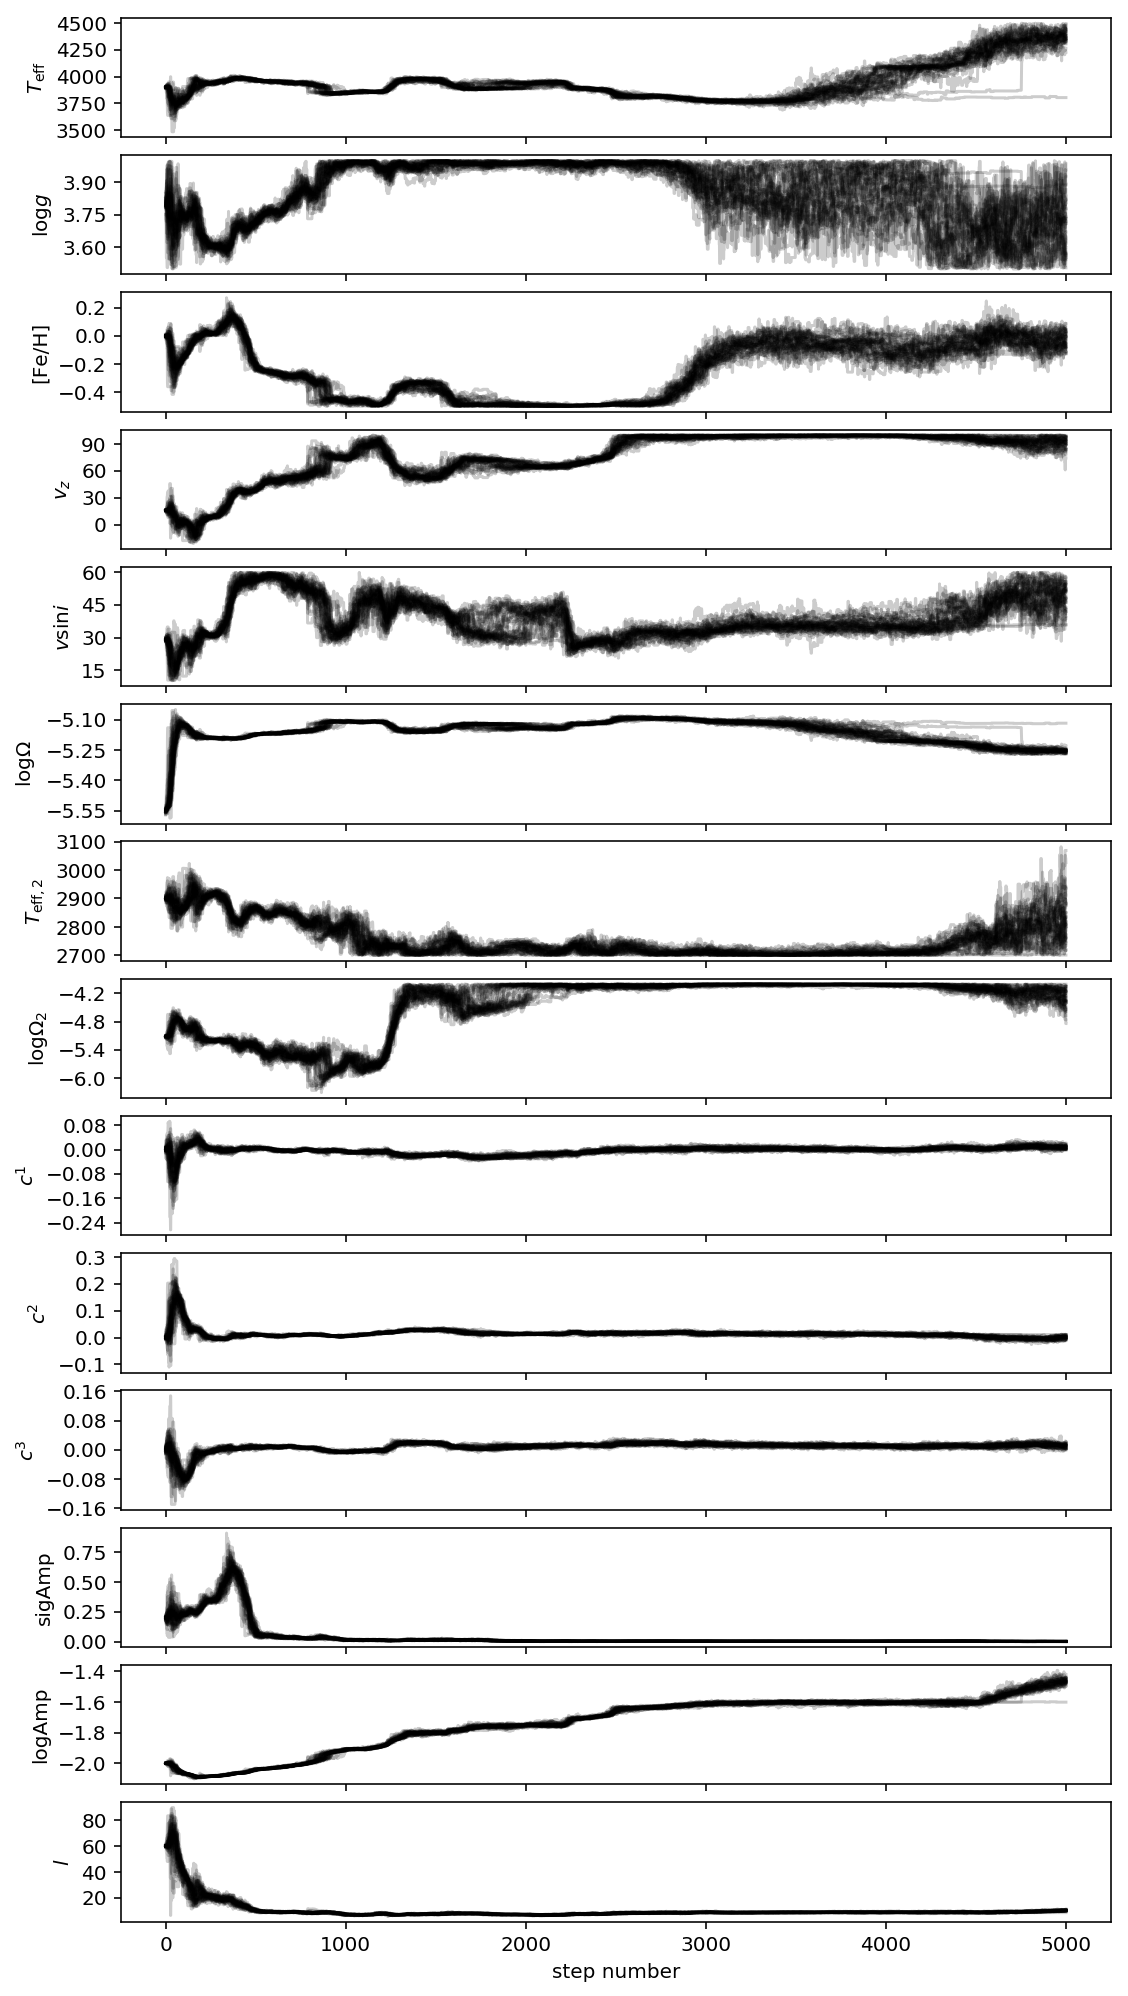

In [13]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(burned[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

In [70]:
df = pd.read_csv('../sf/Anon1/m101/output/mix_emcee/run01/models_draw.csv')
df2 = pd.read_csv('../sf/Anon1/m101/output/mix_emcee/run01/spec_config.csv')

In [71]:
df2.head()

,data,wl,model_composite
0,0.991529,17628.021719,0.758528
1,0.989045,17628.150218,0.750573
2,0.987304,17628.278699,0.743650
3,0.970024,17628.407162,0.738397
4,0.969542,17628.535607,0.734914


In [72]:
CC = np.load('../sf/Anon1/m101/output/mix_emcee/run01/CC.npy')

draw = np.random.multivariate_normal(df.model_comp50, CC)

(0, 1.3)

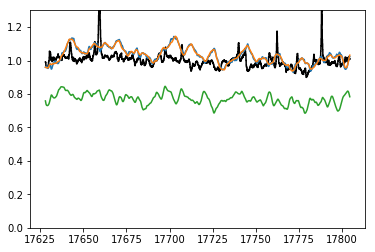

In [77]:
plt.step(df.wl, df.data, 'k')
plt.plot(df.wl,draw/5.0,)
plt.plot(df.wl, df.model_comp50/5,)
plt.plot(df2.wl, df2.model_composite,)
plt.ylim(0,1.3)

In [15]:
#plt.plot(df.wl, df.data-df.model_comp50,label='default')
#plt.plot(df.wl, df.data-(df.model_comp50-0.05),)
#plt.legend()

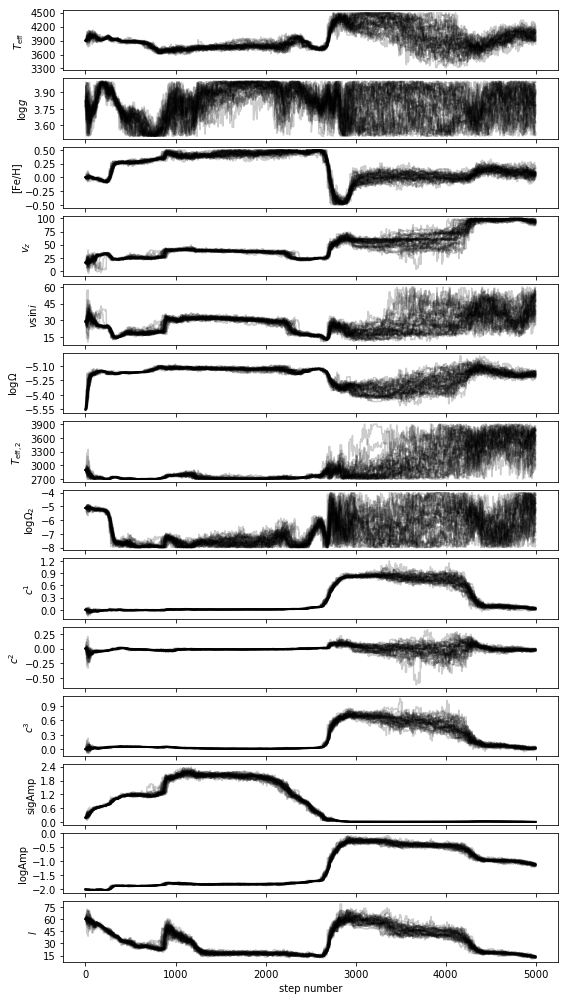

In [16]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(burned[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

In [7]:
fc.shape

(40000, 11)

In [8]:
dat1 = pd.read_csv('../sf/2M0136/m113/output/marley_grid/run01/spec_config.csv')
dat2 = pd.read_csv('../sf/2M0136/m113/output/marley_grid/run01/models_draw.csv')

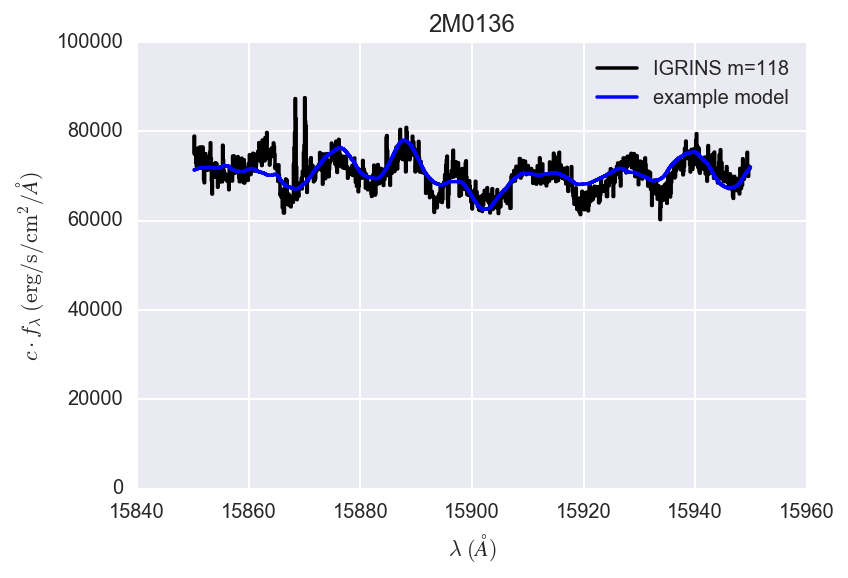

In [9]:
plt.step(dat1.wl, dat1.data, 'k', label='IGRINS m=118')
plt.step(dat1.wl, dat2.model_comp50, 'b', label='example model')
#plt.step(dat1.wl, dat1.model_composite, 'r',label='Guess')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$c\cdot f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('2M0136')
plt.legend(loc='best')
plt.ylim(0, 100000)
plt.yscale('linear')

In [10]:
import corner

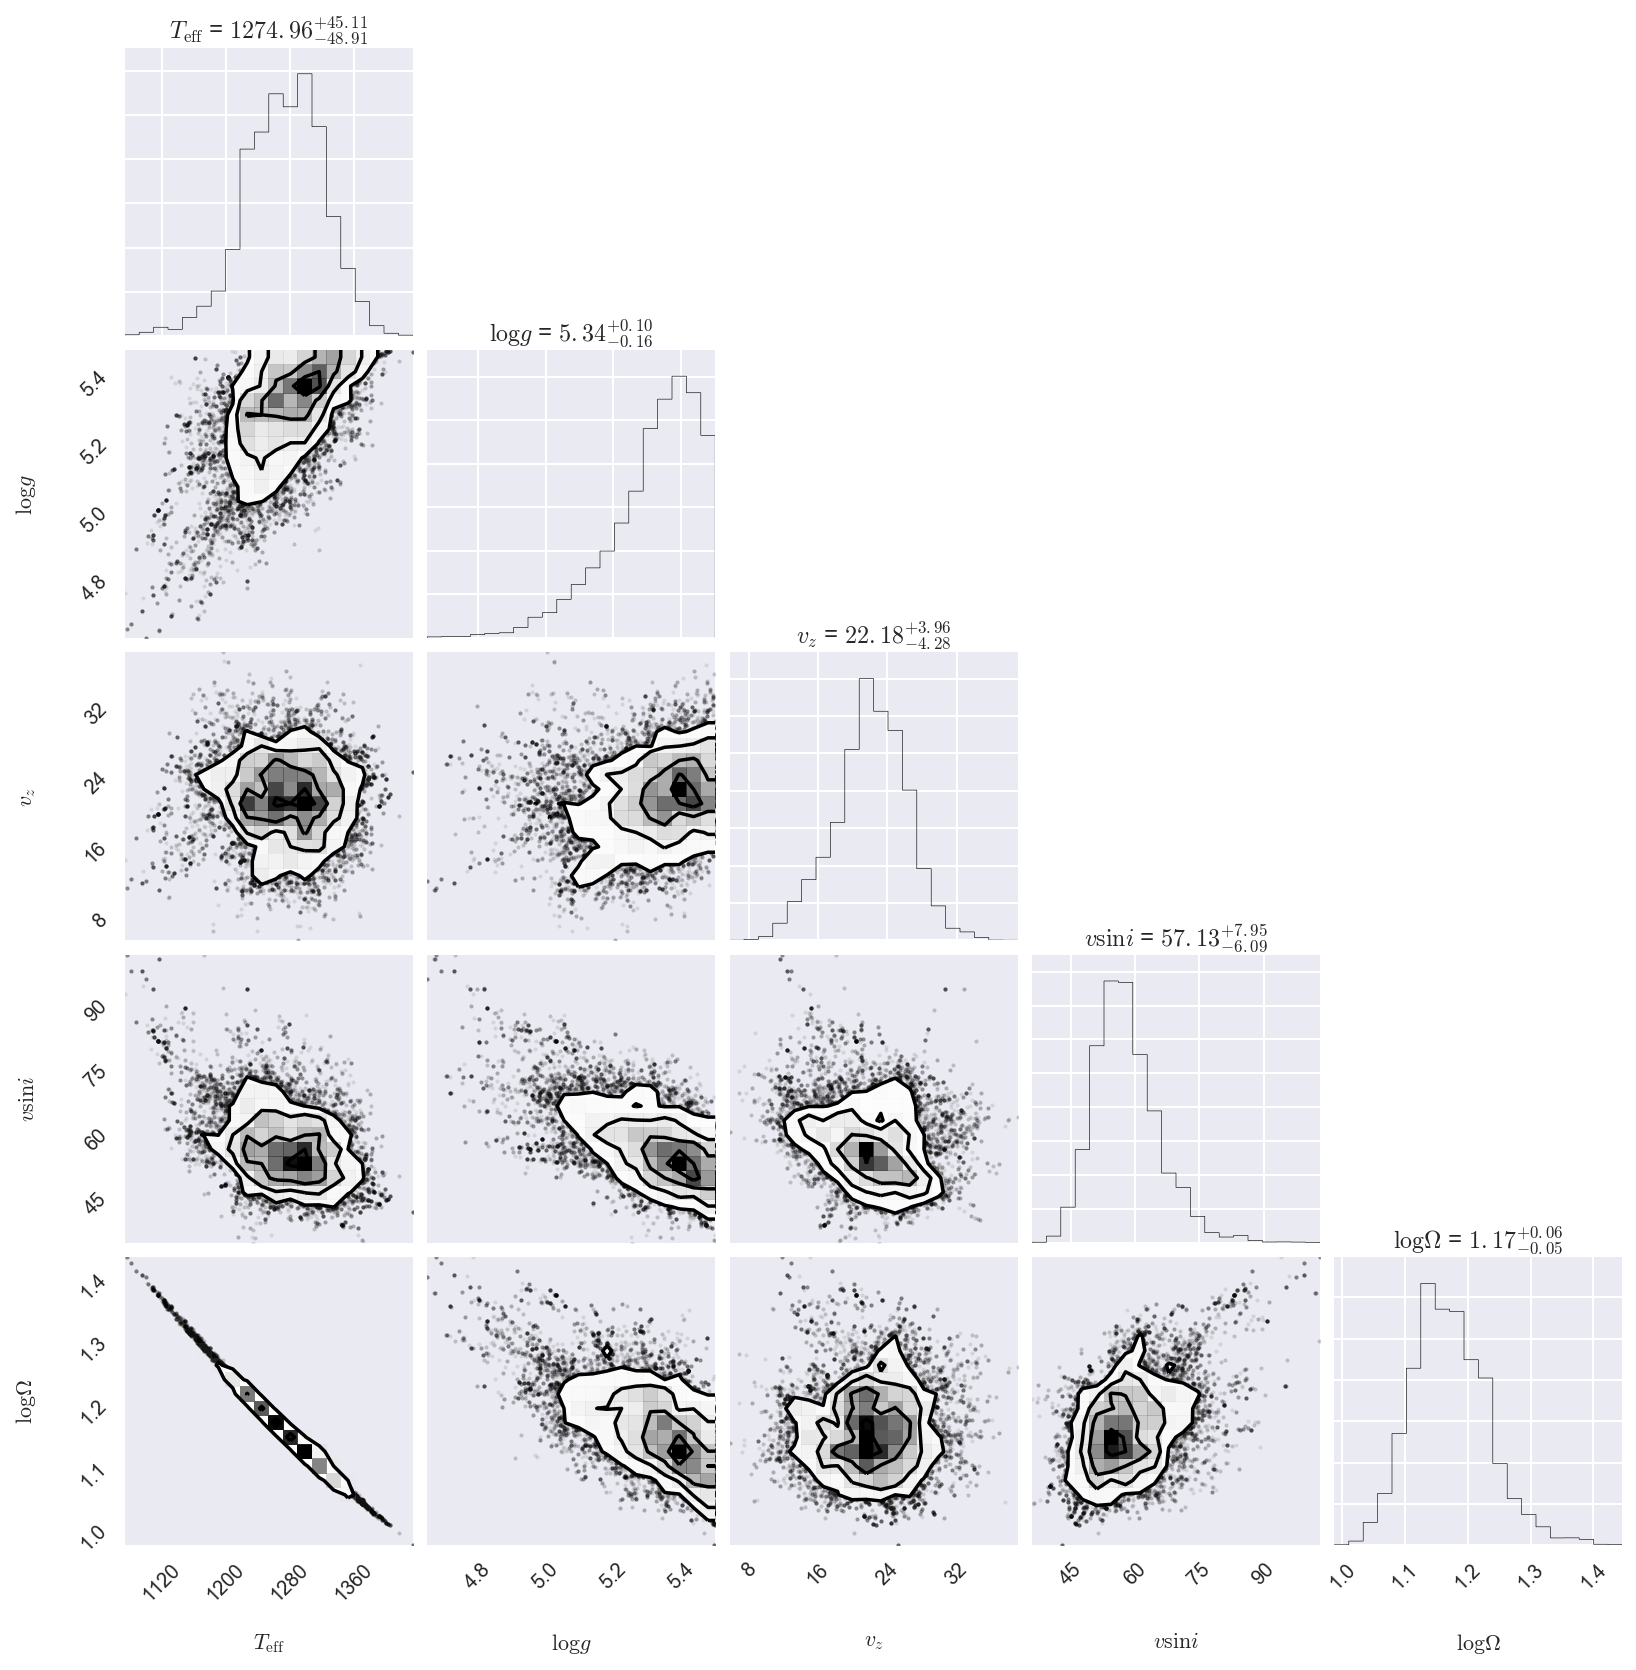

In [11]:
fig = corner.corner(fc[:, 0:5], labels=label[0:5], show_titles=True)
fig.savefig('../results/2M0136_m113_corner.png', dpi=300)

Temperature and solid angle should be strongly degenerate now-- we have *intentionally* added back the absolute flux scaling (basically $\propto \sigma T^4$) that was removed in the `Starfish Classic` mode.  We might consider getting rid of the absolute flux scaling if this turns out to be an issue.  The `emcee` sampler seems to handle the strong degeneracy just fine.

The model likes warm temperatures and high (the highest possible) surface gravity.  I recall Mark Marley predicted this from a physical chemistry perspective.

The end.

<!--NAVIGATION-->
< [Spotcheck mixture model of Anon1](03.01-Mixture-model-Anon1-spot-check.ipynb) | [Contents](Index.ipynb) | [Lightcurves](04.00-Lightcurves.ipynb) >